In [16]:
import numpy as np
import pandas as pd
import statistics as st
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv("C:\\Users\\Arunima Srivastava\\Downloads\\12cirrhosis.csv")
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
308,309,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
309,310,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
310,311,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [17]:
df['Drug'].value_counts()

Drug
D-penicillamine    158
Placebo            154
Name: count, dtype: int64

In [18]:
df.isnull().sum()

ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [19]:
st.median(df['Copper']),st.median(df['Platelets'])

(75.0, 91.5)

In [20]:
def median(var):
    z = df[df[var].notnull()]
    z = z[[var,'Stage']].groupby(['Stage'])[[var]].median().reset_index()
    return z

In [21]:
median('Cholesterol'),median('Tryglicerides')

(   Stage  Cholesterol
 0      1        239.0
 1      2        298.0
 2      3        324.0
 3      4        299.0,
    Stage  Tryglicerides
 0      1           84.0
 1      2          101.0
 2      3          119.0
 3      4          106.0)

In [22]:
df.loc[(df['Stage']==1)&(df['Cholesterol'].isnull()),'Cholesterol']=232.5
df.loc[(df['Stage']==2)&(df['Cholesterol'].isnull()),'Cholesterol']=303
df.loc[(df['Stage']==3)&(df['Cholesterol'].isnull()),'Cholesterol']=324
df.loc[(df['Stage']==4)&(df['Cholesterol'].isnull()),'Cholesterol']=299.5


df.loc[(df['Stage']==1)&(df['Tryglicerides'].isnull()),'Tryglicerides']=82
df.loc[(df['Stage']==2)&(df['Tryglicerides'].isnull()),'Tryglicerides']=101
df.loc[(df['Stage']==3)&(df['Tryglicerides'].isnull()),'Tryglicerides']=119
df.loc[(df['Stage']==4)&(df['Tryglicerides'].isnull()),'Tryglicerides']=106.5

df.loc[(df['Copper'].isnull()),'Copper']=75
df.loc[(df['Platelets'].isnull()),'Platelets']=91.5
df.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

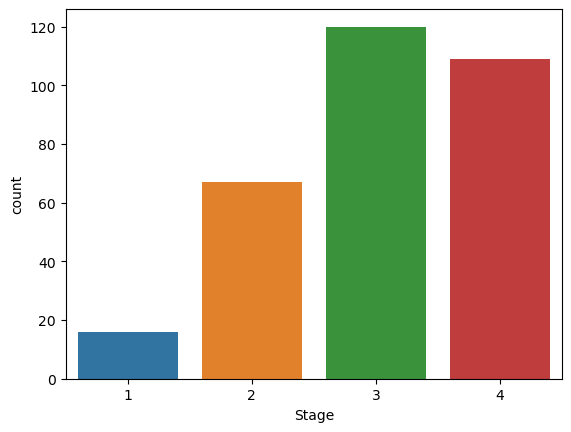

In [23]:
sns.countplot(x=df['Stage']);

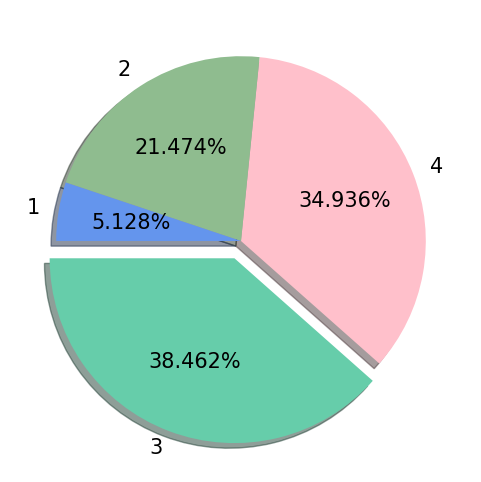

In [24]:
# Pie plot for percentage of each stage level
plt.figure(figsize=(6,6))
data = df['Stage'].value_counts().values.tolist()
label = df['Stage'].value_counts().index.tolist()
plt.pie(data, labels = label, autopct = '%.3f%%', colors=['mediumaquamarine','pink','darkseagreen','cornflowerblue'], startangle =180, explode=[0.1,0,0,0], shadow = True)

for text in plt.gca().texts:
     text.set_fontsize(15)
plt.show()


C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


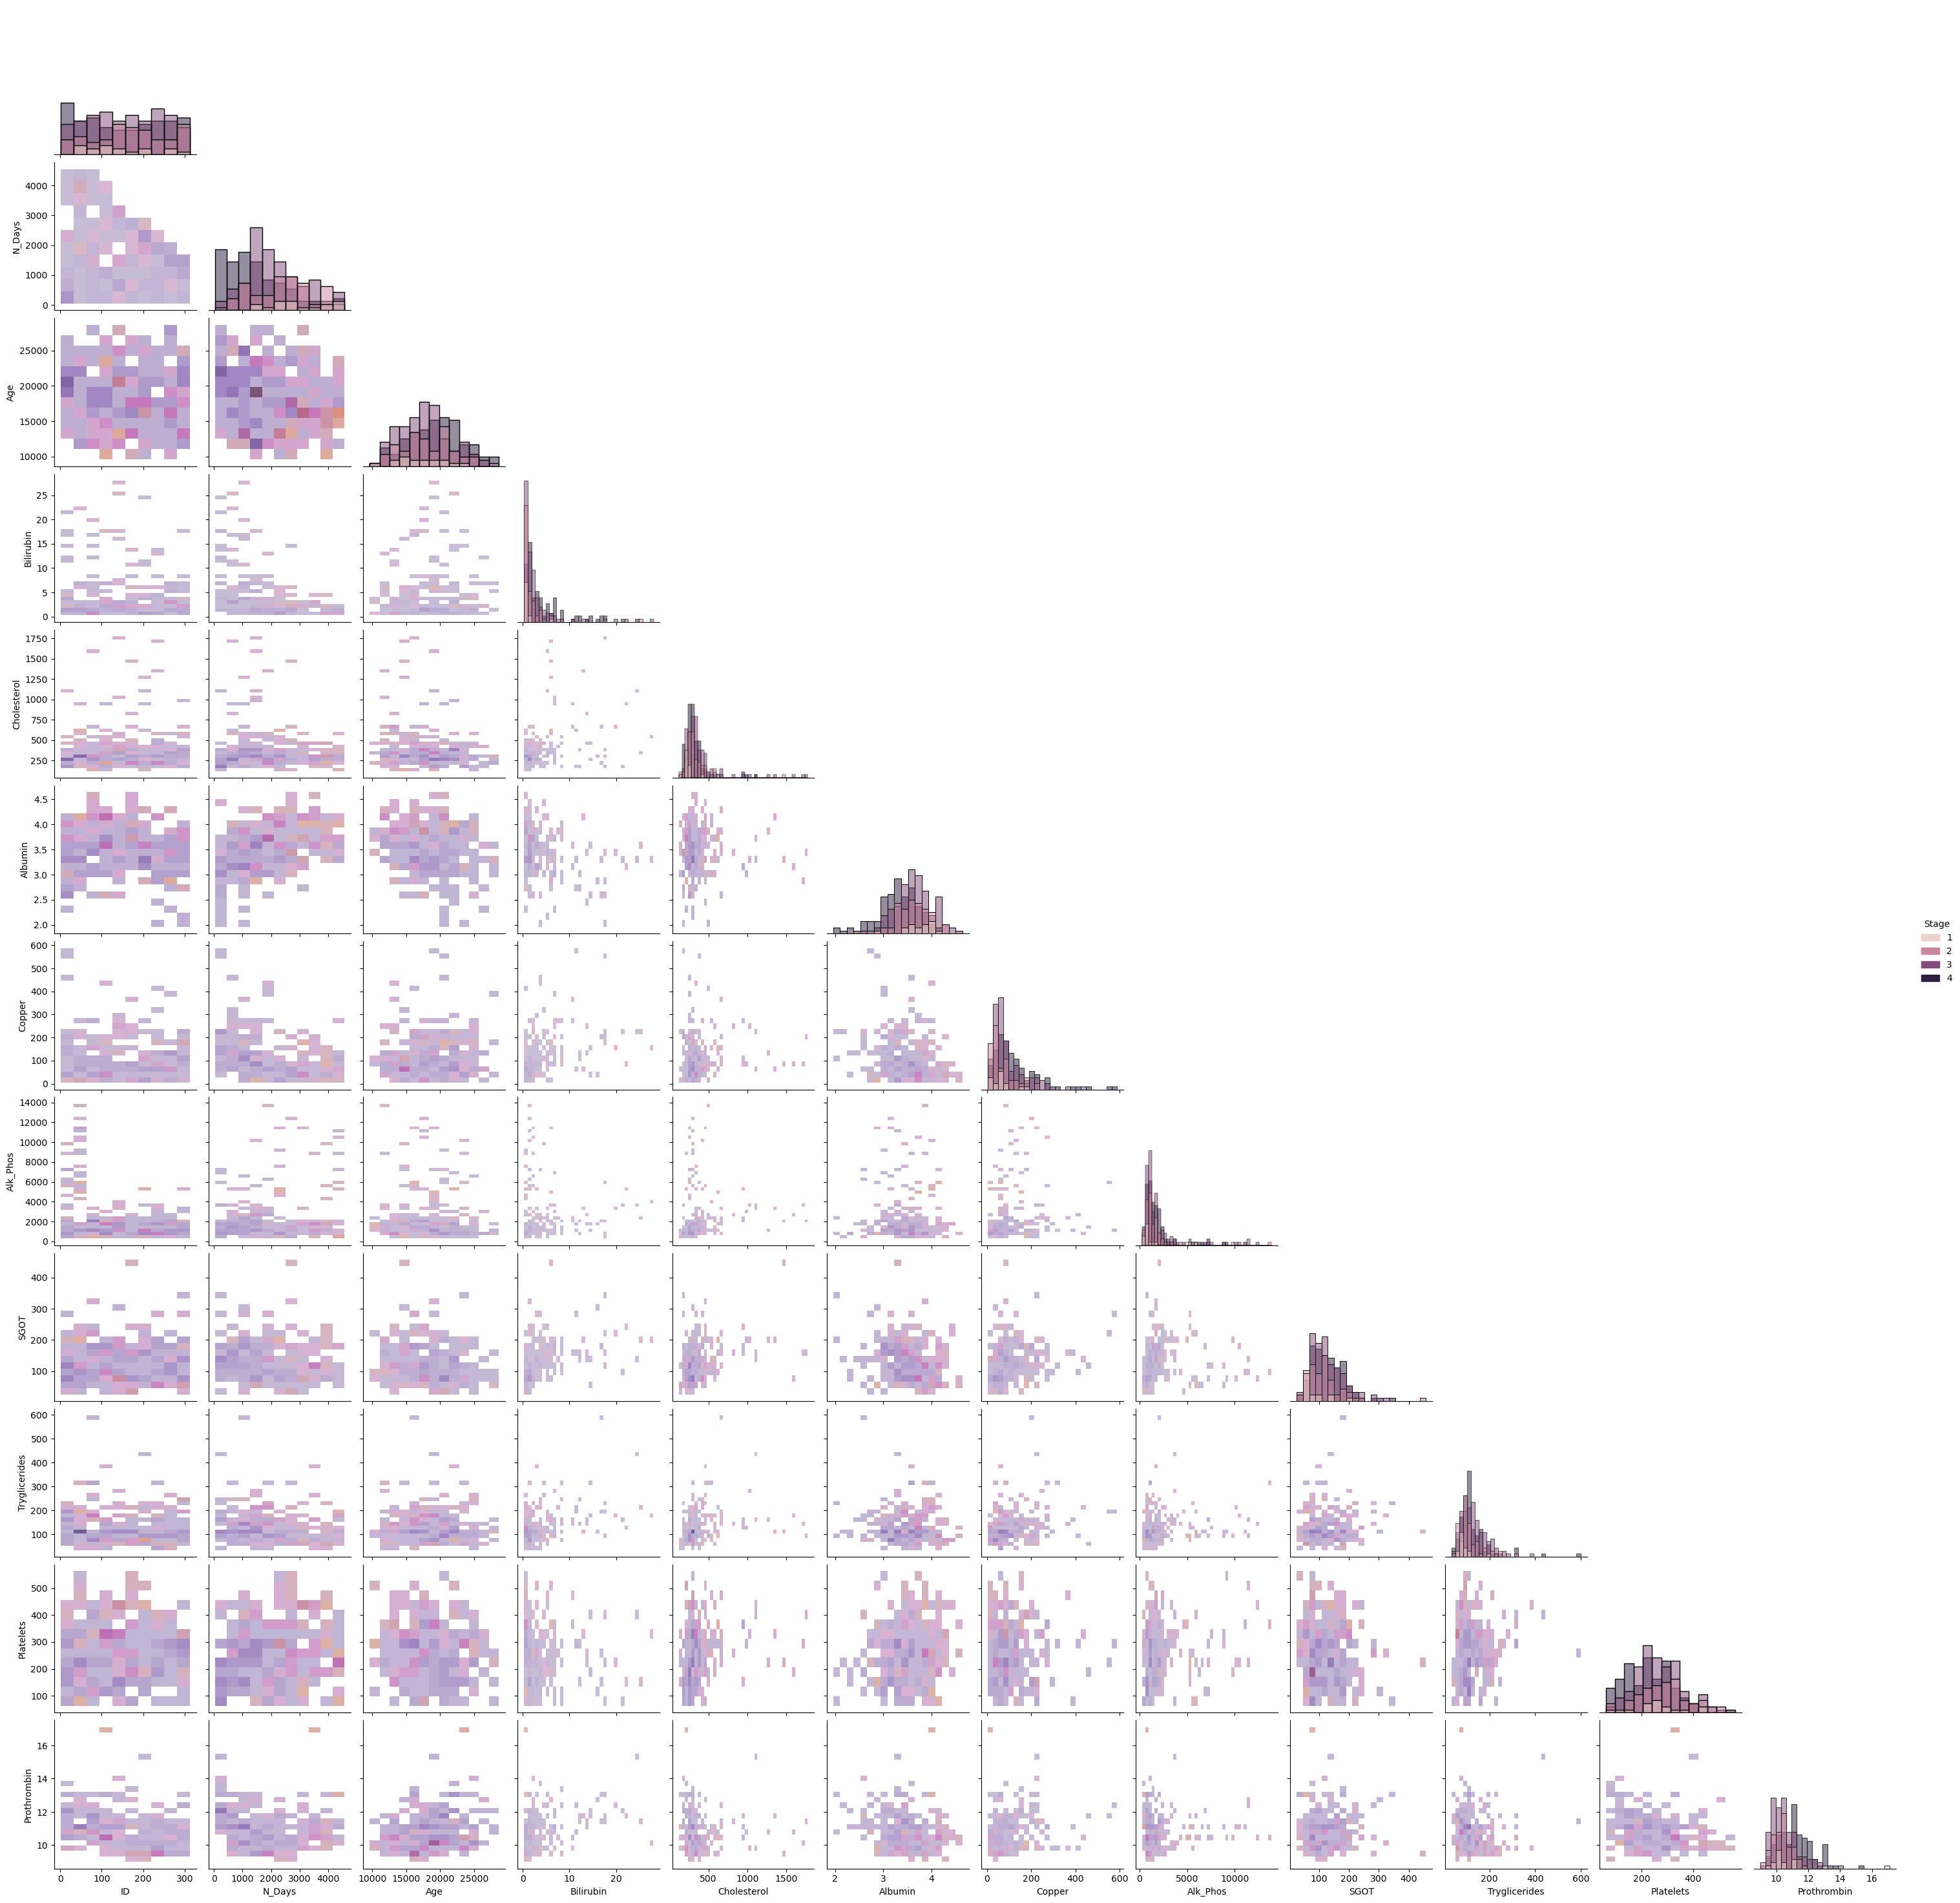

In [25]:
from pandas.plotting import scatter_matrix
sns.pairplot(df,hue="Stage",kind="hist",corner=True)

C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\197878875.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\197878875.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\197878875.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


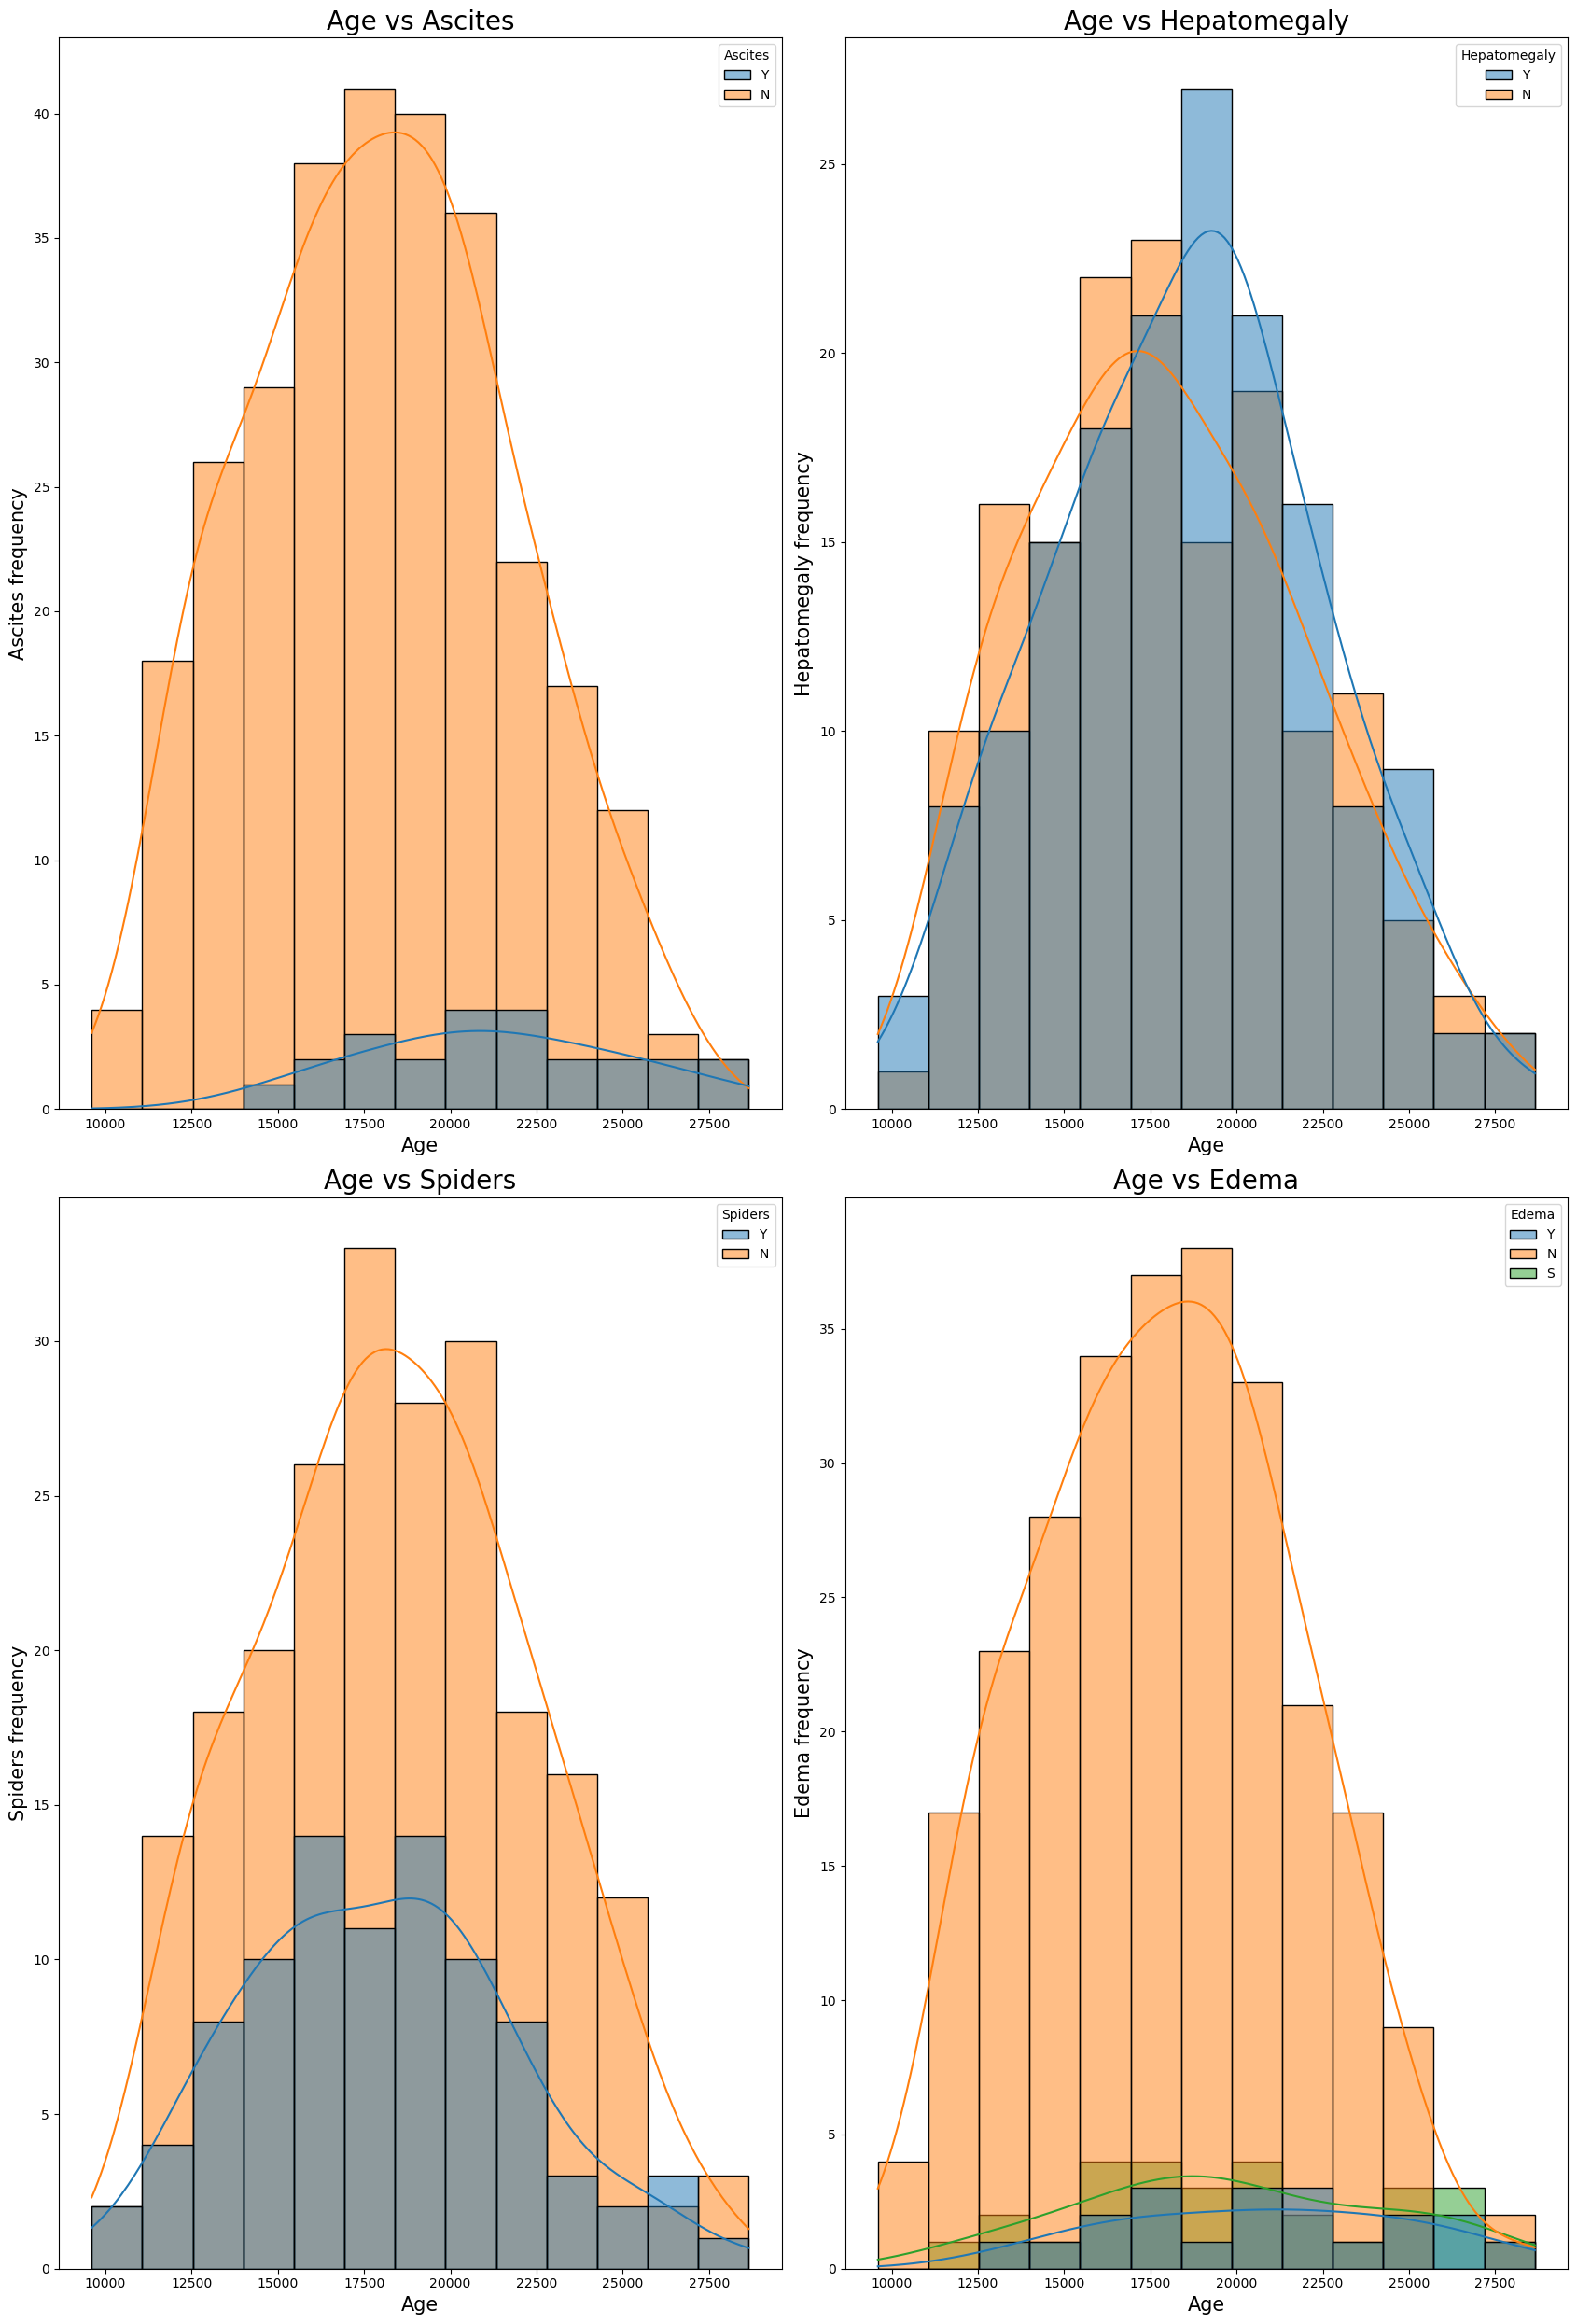

In [26]:
cols = ['Ascites','Hepatomegaly','Spiders','Edema']
df.Age = df.Age.astype(int)
fig, axes = plt.subplots(figsize=(17, 25), nrows=2, ncols=2)
axes = axes.flatten()

for i in range(len(cols)):
    sns.histplot(data=df, hue=df[cols[i]], x='Age', ax=axes[i], kde=True)
    axes[i].set_ylabel(f'{cols[i]} frequency', fontsize=15)
    axes[i].set_xlabel("Age", fontsize=15)
    axes[i].set_title(f'Age vs {cols[i]}', fontsize=20)
    plt.tight_layout()
for j in range(len(cols), len(axes)):
    axes[j].set_visible(False)
plt.show()

<Figure size 1500x1000 with 0 Axes>

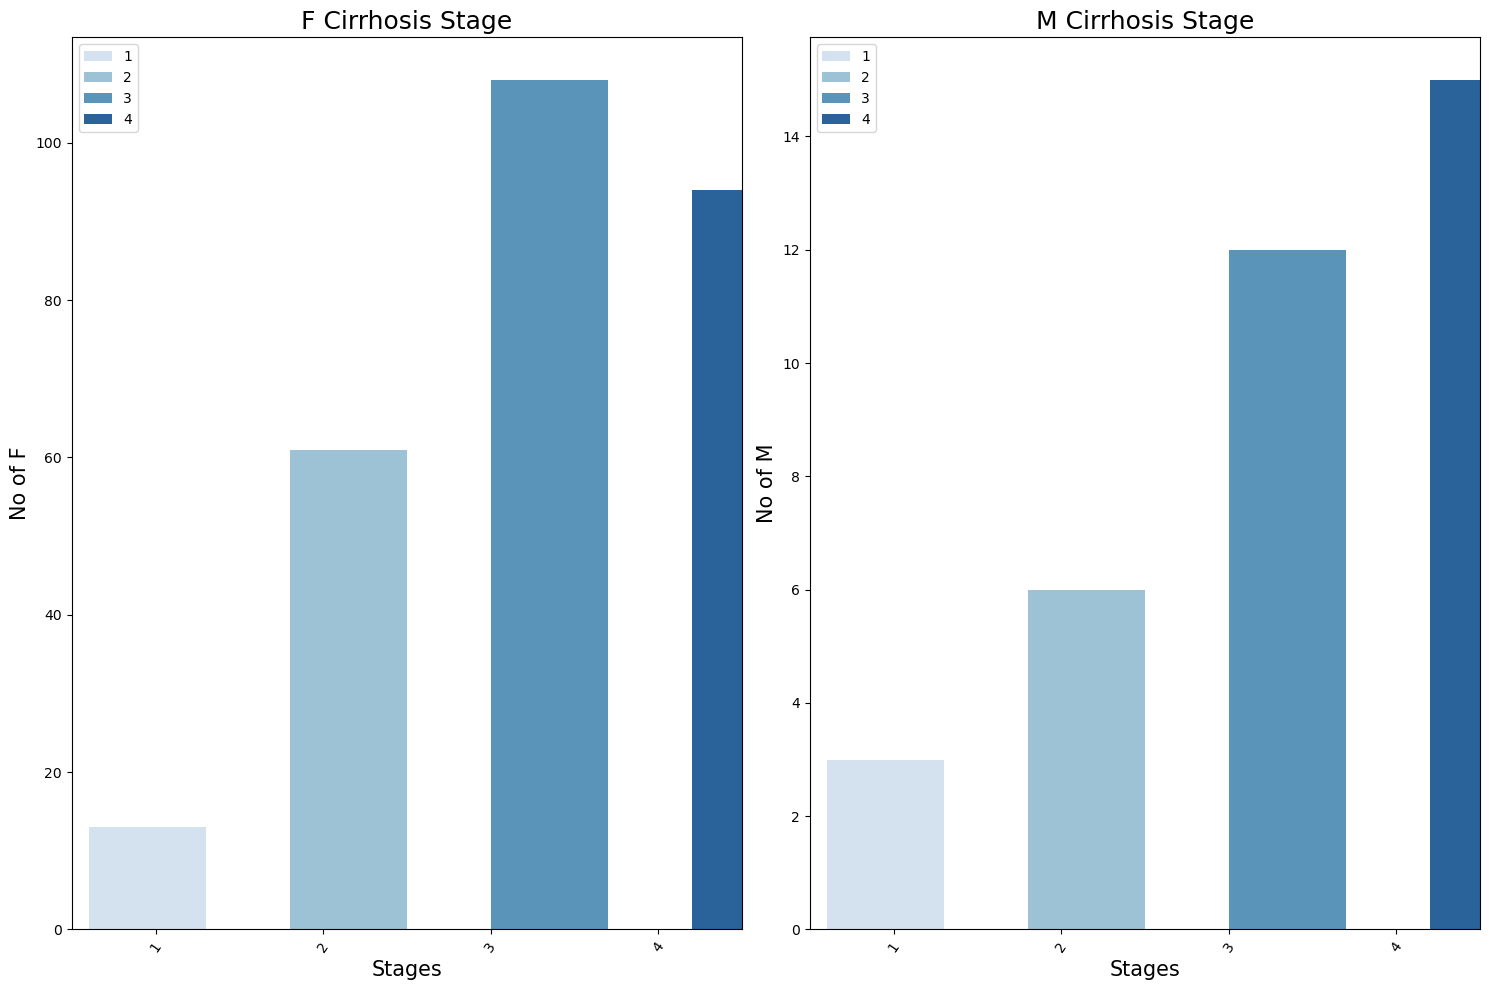

In [27]:
df_gender_OL = df.groupby(['Stage', 'Sex']).size().unstack()
plt.figure(figsize=(15, 10))  # Adjust figure size
fig, axis = plt.subplots(figsize=(15, 10), nrows=1, ncols=2)

Gender = ["F", "M"]
for i in range(2):
    X = df_gender_OL.index.tolist()
    Y = df_gender_OL[Gender[i]].value_counts().index.tolist()
    ax = sns.barplot(data=df_gender_OL, x=X, y=Y, ax=axis[i], hue=X, palette='Blues') 
    for bar in ax.patches: 
        bar.set_width(0.7)
    axis[i].set_title(f'{Gender[i]} Cirrhosis Stage', fontsize=18)
    axis[i].set_xlabel("Stages", fontsize=15)
    axis[i].set_ylabel(f'No of {Gender[i]}', fontsize=15)
    axis[i].tick_params(axis='x', rotation=55)

plt.tight_layout() 
plt.show()

In [28]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int32
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [30]:
from sklearn.model_selection import train_test_split as tts

In [31]:
#Encoding the Categorical vraiables
newdata=pd.get_dummies(df,columns=['Sex','Ascites','Hepatomegaly','Spiders','Edema'],dtype=float)
newdata['Status'] = newdata['Status'].replace({'D':1,'C':0,'CL':0})
newdata['Drug'] = newdata['Drug'].replace({'D-penicillamine':1,'Placebo':0})
X = newdata.drop(columns=['Status','Stage'], axis=1)
Y = newdata['Stage']

In [32]:
#Checking VIF values
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
def vif(ytest, ypred) -> float:
    return (1.0 / (1 - r2_score(ytest, ypred)))
VIF_THRESHOLD = 2.5
print(f"{'Highest VIF Column':25}  Highest VIF Value")
for _ in range(len(df.columns)):
    vif_vals = pd.Series()
    for col in X.columns:
        y_new = X[col]
        x_new = X.drop(col, axis=1)
        lr = LinearRegression()
        lr.fit(x_new, y_new)
        ypred = lr.predict(x_new)
        vif_vals[col] = vif(y_new, ypred)
    highest_vif_col = vif_vals.idxmax()
    highest_vif = vif_vals.max()
    if highest_vif <= VIF_THRESHOLD:
        print('VIF Threshold Reached. All columns have VIF <= 2.5')
        break
    print(f"{highest_vif_col:25}  {highest_vif:4.3f}")
    X.drop(highest_vif_col, axis=1, inplace=True)

Highest VIF Column         Highest VIF Value


C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413

Sex_F                       inf
Ascites_N                   inf


C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413

Hepatomegaly_N              inf
Spiders_N                   inf


C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))


Edema_N                     inf
VIF Threshold Reached. All columns have VIF <= 2.5


C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))
C:\Users\Arunima Srivastava\AppData\Local\Temp\ipykernel_16236\3533413291.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return (1.0 / (1 - r2_score(ytest, ypred)))


C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 81.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arunima Srivastava\anaconda3\Lib\site-packag

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'ID'),
  Text(1, 0, 'N_Days'),
  Text(2, 0, 'Drug'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'Bilirubin'),
  Text(5, 0, 'Cholesterol'),
  Text(6, 0, 'Albumin'),
  Text(7, 0, 'Copper'),
  Text(8, 0, 'Alk_Phos'),
  Text(9, 0, 'SGOT'),
  Text(10, 0, 'Tryglicerides')])

C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


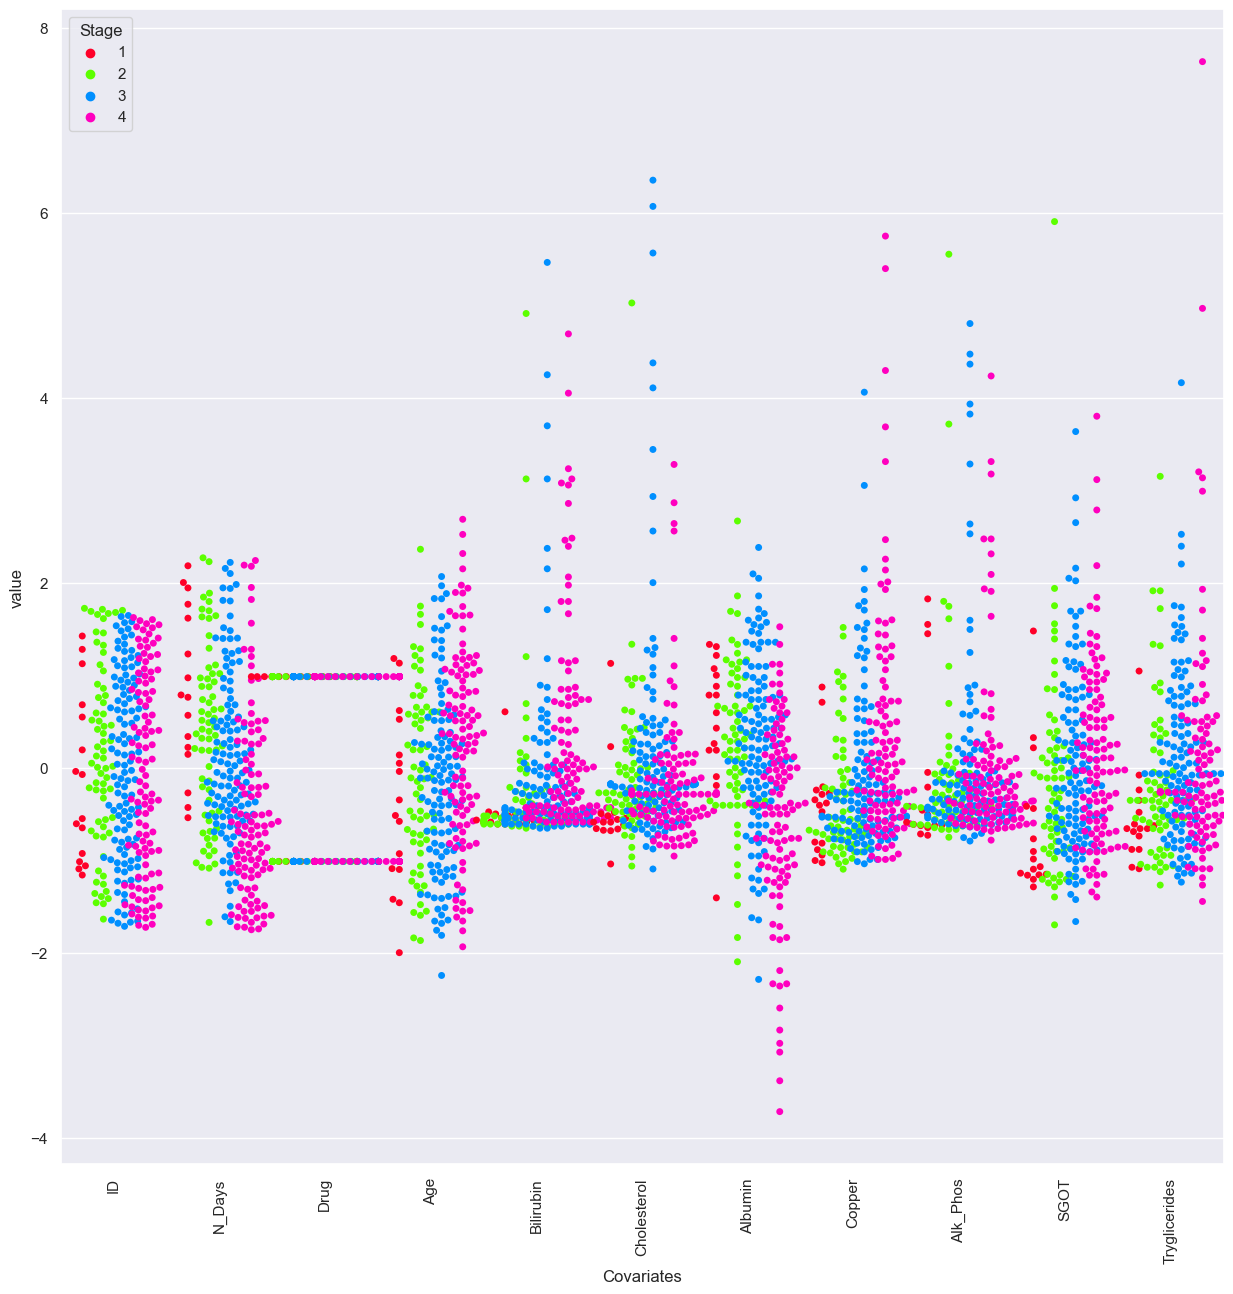

In [33]:
sns.set(style="darkgrid")
data_stage = Y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([Y,data_n_2.iloc[:,0:11]],axis=1)
data = pd.melt(data,id_vars="Stage",
                    var_name="Covariates",
                    value_name='value')
plt.figure(figsize=(15,15))
#tic = time.time()
sns.swarmplot(x="Covariates", y="value", hue="Stage", data=data, palette='gist_rainbow',dodge=True, edgecolor="green")
plt.xticks(rotation=90)

In [34]:
from sklearn.model_selection import train_test_split as tts

In [35]:
X = df.drop(columns=['Age','Bilirubin', 'Cholesterol', 'Tryglicerides','SGOT','N_Days','Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Stage'], axis=1)
Y = df['Stage']

In [36]:
Xt,X_t,Yt,Y_t = tts(X,Y,test_size=0.25,random_state=23)

In [37]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
mod = OrderedModel(df['Stage'], df[['Age','Bilirubin','Cholesterol','Albumin','Copper','SGOT','Tryglicerides','Platelets','Prothrombin']],distr='logit')

In [38]:
res = mod.fit(method='bfgs')

         Current function value: 1.084411
         Iterations: 37
         Function evaluations: 87
         Gradient evaluations: 76


C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:1359: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  Stage   Log-Likelihood:                -338.34
Model:                   OrderedModel   AIC:                             700.7
Method:            Maximum Likelihood   BIC:                             745.6
Date:                Sun, 13 Oct 2024                                         
Time:                        18:42:47                                         
No. Observations:                 312                                         
Df Residuals:                     300                                         
Df Model:                           9                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age            4.014e-05    3.1e-05      1.296      0.195   -2.05e-05       0.000
Bilirubin         0.0154      0.038      0.406      0.684      -0.059       0.090
Cholesterol      -0.0006      0.001     -1.098      0.272      -0.002       0.000
Albumin          -1.1486      0.307     -3.743      0.000      -1.750      -0.547
Copper            0.0038      0.002      2.313      0.021       0.001       0.007
SGOT              0.0022      0.002      0.959      0.338      -0.002       0.007
Tryglicerides     0.0025      0.002      1.183      0.237      -0.002       0.007
Platelets        -0.0032      0.001     -2.638      0.008      -0.006      -0.001
Prothrombin       0.4105      0.146      2.803      0.005       0.123       0.698
1/2              -2.2998      2.135     -1.077      0.281      -6.484       1.885
2/3               0.7078      0.122      5.793      0.000       0.468       0.947
3/4               0.6911      0.082      8.471      0.000       0.531       0.851
=================================================================================
"""

In [40]:
from scipy import stats as st
'Drug','Ascites','Hepatomegaly','Spiders','Edema','Stage'
result = st.kruskal(df['Drug'],df['Ascites'],df['Hepatomegaly'],df['Spiders'],df['Edema'])
print(result)

KruskalResult(statistic=208.16048323989006, pvalue=6.607641193884126e-44)


In [41]:
#performing stepwise regression for feature selection
import statsmodels.api as sm
result = sm.OLS(Yt,Xt).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Stage   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              539.3
Date:                Sun, 13 Oct 2024   Prob (F-statistic):                   1.15e-131
Time:                        18:42:49   Log-Likelihood:                         -283.30
No. Observations:                 234   AIC:                                      578.6
Df Residuals:                     228   BIC:                                      599.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
ID              0.0013      0.001      2.018      0.045    2.94e-05       0.002
Albumin        -0.1827      0.102     -1.784      0.076      -0.385       0.019
Copper          0.0018      0.001      2.779      0.006       0.001       0.003
Alk_Phos      1.08e-05   2.65e-05      0.408      0.684   -4.14e-05    6.29e-05
Platelets      -0.0003      0.001     -0.576      0.565      -0.001       0.001
Prothrombin     0.3131      0.033      9.553      0.000       0.249       0.378
==============================================================================
Omnibus:                       35.861   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.402
Skew:                          -0.943   Prob(JB):                     1.14e-11
Kurtosis:                       4.269   Cond. No.                     5.98e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
from sklearn.metrics import cohen_kappa_score as kp
k1 = kp(df['Drug'],df['Ascites'])
k2 = kp(df['Drug'],df['Hepatomegaly'])
k3 = kp(df['Drug'],df['Spiders'])
k4 = kp(df['Ascites'],df['Hepatomegaly'])
k5 = kp(df['Ascites'],df['Spiders'])
k6 = kp(df['Hepatomegaly'],df['Spiders'])
k7 = kp(df['Drug'],df['Edema'])
k8 = kp(df['Ascites'],df['Edema'])
k9 = kp(df['Hepatomegaly'],df['Edema'])
k10 = kp(df['Spiders'],df['Edema'])

k1,k2,k3,k4,k5,k6,k7,k8,k9,k10

(0.0,
 0.0,
 0.0,
 0.08397683397683386,
 0.1213517665130569,
 0.2643902439024389,
 0.0,
 0.3943181818181818,
 0.08418254319893659,
 0.17713547553689646)

In [43]:
#measuring correlation using chi-square test of association
from scipy.stats import chi2_contingency as cont
def is_corr(x,y):
    ct = pd.crosstab(index=df[x],columns=df[y])
    chi_sq_result = cont(ct,)
    p,x = chi_sq_result[1],'correlated'if chi_sq_result[1] < 0.05 else 'not correlated'
    return p,x

In [44]:
print(is_corr('Spiders','Edema'),is_corr('Hepatomegaly','Edema'),is_corr('Ascites','Edema'),is_corr('Drug','Edema'))

(9.267839029498672e-06, 'correlated') (0.008163382192752115, 'correlated') (3.715556181125327e-27, 'correlated') (0.8768194892191297, 'not correlated')


In [45]:
k1 = is_corr('Drug','Ascites')
k2 = is_corr('Drug','Hepatomegaly')
k3 = is_corr('Drug','Spiders')
k4 = is_corr('Ascites','Hepatomegaly')
k5 = is_corr('Ascites','Spiders')
k6 = is_corr('Hepatomegaly','Spiders')
print(k1,k2,k3,k4,k5,k6)

(0.5672864694650058, 'not correlated') (0.08820883682495376, 'not correlated') (0.9846603589186731, 'not correlated') (0.00848613283010399, 'correlated') (0.008914058731742284, 'correlated') (3.643797942894841e-07, 'correlated')


In [46]:
model = OrderedModel(df['Stage'], df[['Albumin','Copper','Platelets','Prothrombin']],distr='logit')

In [47]:
res = model.fit(method='bfgs')
res.summary()

Optimization terminated successfully.
         Current function value: 1.092487
         Iterations: 30
         Function evaluations: 34
         Gradient evaluations: 34


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  Stage   Log-Likelihood:                -340.86
Model:                   OrderedModel   AIC:                             695.7
Method:            Maximum Likelihood   BIC:                             721.9
Date:                Sun, 13 Oct 2024                                         
Time:                        18:42:53                                         
No. Observations:                 312                                         
Df Residuals:                     305                                         
Df Model:                           4                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Albumin        -1.2349      0.296     -4.165      0.000      -1.816      -0.654
Copper          0.0044      0.002      2.948      0.003       0.001       0.007
Platelets      -0.0034      0.001     -2.920      0.003      -0.006      -0.001
Prothrombin     0.4292      0.135      3.171      0.002       0.164       0.694
1/2            -3.5198      1.929     -1.825      0.068      -7.300       0.260
2/3             0.7022      0.122      5.740      0.000       0.462       0.942
3/4             0.6833      0.082      8.376      0.000       0.523       0.843
===============================================================================
"""

In [48]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


In [49]:
df1=df.drop(columns=['Bilirubin','Cholesterol','Alk_Phos','SGOT','Tryglicerides'])
df1

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Albumin,Copper,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,2.60,156.0,190.0,12.2,4
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,4.14,54.0,221.0,10.6,3
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,3.48,210.0,151.0,12.0,4
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,2.54,64.0,183.0,10.3,4
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.53,143.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,F,N,Y,N,N,3.58,24.0,288.0,10.4,2
308,309,994,C,Placebo,21294,F,N,N,N,N,2.75,41.0,231.0,10.8,2
309,310,939,C,D-penicillamine,22767,F,N,N,N,N,3.35,39.0,234.0,10.2,2
310,311,839,C,D-penicillamine,13879,F,N,N,N,N,3.16,69.0,335.0,10.5,2


In [50]:
df1.dtypes
df1_cat=df1.select_dtypes(include='object')
df1_cat

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,D,D-penicillamine,F,Y,Y,Y,Y
1,C,D-penicillamine,F,N,Y,Y,N
2,D,D-penicillamine,M,N,N,N,S
3,D,D-penicillamine,F,N,Y,Y,S
4,CL,Placebo,F,N,Y,Y,N
...,...,...,...,...,...,...,...
307,C,D-penicillamine,F,N,Y,N,N
308,C,Placebo,F,N,N,N,N
309,C,D-penicillamine,F,N,N,N,N
310,C,D-penicillamine,F,N,N,N,N


In [51]:
new_data1=pd.get_dummies(df1,columns=['Sex','Ascites','Hepatomegaly','Spiders','Status','Drug','Edema'],dtype=float)
new_data1

,ID,N_Days,Age,Albumin,Copper,Platelets,Prothrombin,Stage,Sex_F,Sex_M,...,Spiders_N,Spiders_Y,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_Placebo,Edema_N,Edema_S,Edema_Y
0,1,400,21464,2.60,156.0,190.0,12.2,4,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,2,4500,20617,4.14,54.0,221.0,10.6,3,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,1012,25594,3.48,210.0,151.0,12.0,4,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,4,1925,19994,2.54,64.0,183.0,10.3,4,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,5,1504,13918,3.53,143.0,136.0,10.9,3,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,22347,3.58,24.0,288.0,10.4,2,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
308,309,994,21294,2.75,41.0,231.0,10.8,2,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
309,310,939,22767,3.35,39.0,234.0,10.2,2,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
310,311,839,13879,3.16,69.0,335.0,10.5,2,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [52]:
newdata=pd.get_dummies(df1,columns=['Sex','Ascites','Hepatomegaly','Spiders','Edema'],dtype=float)
newdata['Status'] = newdata['Status'].replace({'D':1,'C':0,'CL':0})
newdata['Drug'] = newdata['Drug'].replace({'D-penicillamine':1,'Placebo':0})

In [53]:
newdata

,ID,N_Days,Status,Drug,Age,Albumin,Copper,Platelets,Prothrombin,Stage,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,1,400,1,1,21464,2.60,156.0,190.0,12.2,4,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,4500,0,1,20617,4.14,54.0,221.0,10.6,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3,1012,1,1,25594,3.48,210.0,151.0,12.0,4,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1925,1,1,19994,2.54,64.0,183.0,10.3,4,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,1504,0,0,13918,3.53,143.0,136.0,10.9,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,0,1,22347,3.58,24.0,288.0,10.4,2,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
308,309,994,0,0,21294,2.75,41.0,231.0,10.8,2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
309,310,939,0,1,22767,3.35,39.0,234.0,10.2,2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
310,311,839,0,1,13879,3.16,69.0,335.0,10.5,2,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [54]:
newdata.to_csv('newdata.csv')

In [55]:
from lifelines import CoxPHFitter

In [56]:
CoxPHFitter?

In [57]:
cox = CoxPHFitter(penalizer=0.05).fit(newdata,duration_col='N_Days',event_col='Status')

In [58]:
cox.print_summary()

<lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
             duration col = 'N_Days'
                event col = 'Status'
                penalizer = 0.05
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 312
number of events observed = 125
   partial log-likelihood = -559.49
         time fit was run = 2024-10-13 13:13:02 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
ID              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Drug             0.01       1.01       0.18            -0.35             0.37                 0.71                 1.44
Age              0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Albumin         -0.82       0.44       0.24            -1.28            -0.35                 0.28                 0.70
Copper           0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
Platelets       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Prothrombin      0.27       1.31       0.09             0.10             0.44                 1.11                 1.55
Stage            0.19       1.21       0.13            -0.06             0.44                 0.94                 1.56
Sex_F           -0.04       0.96       0.58            -1.16             1.09                 0.31                 2.98
Sex_M            0.04       1.04       0.58            -1.09             1.16                 0.34                 3.20
Ascites_N       -0.16       0.85       0.69            -1.50             1.19                 0.22                 3.29
Ascites_Y        0.16       1.17       0.69            -1.19             1.50                 0.30                 4.50
Hepatomegaly_N  -0.22       0.80       0.37            -0.96             0.51                 0.38                 1.67
Hepatomegaly_Y   0.22       1.25       0.37            -0.51             0.96                 0.60                 2.60
Spiders_N       -0.14       0.87       0.41            -0.94             0.66                 0.39                 1.93
Spiders_Y        0.14       1.15       0.41            -0.66             0.94                 0.52                 2.56
Edema_N         -0.24       0.79       0.50            -1.21             0.74                 0.30                 2.09
Edema_S         -0.07       0.93       0.52            -1.08             0.95                 0.34                 2.58
Edema_Y          0.62       1.86       0.54            -0.44             1.68                 0.64                 5.36

                 cmp to     z      p   -log2(p)
covariate                                      
ID                 0.00 -1.50   0.13       2.89
Drug               0.00  0.05   0.96       0.06
Age                0.00  2.44   0.01       6.08
Albumin            0.00 -3.46 <0.005      10.84
Copper             0.00  4.27 <0.005      15.66
Platelets          0.00 -0.26   0.79       0.33
Prothrombin        0.00  3.12 <0.005       9.12
Stage              0.00  1.51   0.13       2.94
Sex_F              0.00 -0.06   0.95       0.07
Sex_M              0.00  0.06   0.95       0.07
Ascites_N          0.00 -0.23   0.82       0.29
Ascites_Y          0.00  0.23   0.82       0.29
Hepatomegaly_N     0.00 -0.60   0.55       0.86
Hepatomegaly_Y     0.00  0.60   0.55       0.86
Spiders_N          0.00 -0.34   0.73       0.45
Spiders_Y          0.00  0.34   0.73       0.45
Edema_N            0.00 -0.48   0.63       0.66
Edema_S            0.00 -0.13   0.89       0.16
Edema_Y            0.00  1.14   0.25       1.98
---
Concordance = 0.84
Partial AIC = 1156.98
l

In [59]:
newdata1=pd.get_dummies(df1,columns=['Sex','Ascites','Hepatomegaly','Spiders','Edema'],dtype=float)
newdata1['Status'] = newdata['Status'].replace({'D':0,'C':1,'CL':2})
newdata1['Drug'] = newdata['Drug'].replace({'D-penicillamine':1,'Placebo':0})

In [60]:
cox1 = CoxPHFitter(penalizer=0.05).fit(newdata1,duration_col='N_Days',event_col='Status')

In [61]:
cox1.print_summary()

<lifelines.CoxPHFitter: fitted with 312 total observations, 187 right-censored observations>
             duration col = 'N_Days'
                event col = 'Status'
                penalizer = 0.05
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 312
number of events observed = 125
   partial log-likelihood = -559.49
         time fit was run = 2024-10-13 13:13:10 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
ID              -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Drug             0.01       1.01       0.18            -0.35             0.37                 0.71                 1.44
Age              0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Albumin         -0.82       0.44       0.24            -1.28            -0.35                 0.28                 0.70
Copper           0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
Platelets       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Prothrombin      0.27       1.31       0.09             0.10             0.44                 1.11                 1.55
Stage            0.19       1.21       0.13            -0.06             0.44                 0.94                 1.56
Sex_F           -0.04       0.96       0.58            -1.16             1.09                 0.31                 2.98
Sex_M            0.04       1.04       0.58            -1.09             1.16                 0.34                 3.20
Ascites_N       -0.16       0.85       0.69            -1.50             1.19                 0.22                 3.29
Ascites_Y        0.16       1.17       0.69            -1.19             1.50                 0.30                 4.50
Hepatomegaly_N  -0.22       0.80       0.37            -0.96             0.51                 0.38                 1.67
Hepatomegaly_Y   0.22       1.25       0.37            -0.51             0.96                 0.60                 2.60
Spiders_N       -0.14       0.87       0.41            -0.94             0.66                 0.39                 1.93
Spiders_Y        0.14       1.15       0.41            -0.66             0.94                 0.52                 2.56
Edema_N         -0.24       0.79       0.50            -1.21             0.74                 0.30                 2.09
Edema_S         -0.07       0.93       0.52            -1.08             0.95                 0.34                 2.58
Edema_Y          0.62       1.86       0.54            -0.44             1.68                 0.64                 5.36

                 cmp to     z      p   -log2(p)
covariate                                      
ID                 0.00 -1.50   0.13       2.89
Drug               0.00  0.05   0.96       0.06
Age                0.00  2.44   0.01       6.08
Albumin            0.00 -3.46 <0.005      10.84
Copper             0.00  4.27 <0.005      15.66
Platelets          0.00 -0.26   0.79       0.33
Prothrombin        0.00  3.12 <0.005       9.12
Stage              0.00  1.51   0.13       2.94
Sex_F              0.00 -0.06   0.95       0.07
Sex_M              0.00  0.06   0.95       0.07
Ascites_N          0.00 -0.23   0.82       0.29
Ascites_Y          0.00  0.23   0.82       0.29
Hepatomegaly_N     0.00 -0.60   0.55       0.86
Hepatomegaly_Y     0.00  0.60   0.55       0.86
Spiders_N          0.00 -0.34   0.73       0.45
Spiders_Y          0.00  0.34   0.73       0.45
Edema_N            0.00 -0.48   0.63       0.66
Edema_S            0.00 -0.13   0.89       0.16
Edema_Y            0.00  1.14   0.25       1.98
---
Concordance = 0.84
Partial AIC = 1156.98
l

In [62]:
#!pip install psmpy

In [63]:
new_data=newdata.drop(columns=['Status','Stage'])
new_data.head()

,ID,N_Days,Drug,Age,Albumin,Copper,Platelets,Prothrombin,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,1,400,1,21464,2.60,156.0,190.0,12.2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,4500,1,20617,4.14,54.0,221.0,10.6,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3,1012,1,25594,3.48,210.0,151.0,12.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1925,1,19994,2.54,64.0,183.0,10.3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,1504,0,13918,3.53,143.0,136.0,10.9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [64]:
import psmpy
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [65]:
psm= PsmPy(new_data,treatment='Drug',indx='ID',exclude=[])
psm.logistic_ps(balance=True)

In [66]:
score = psm.predicted_data
score

,ID,N_Days,Age,Albumin,Copper,Platelets,Prothrombin,Sex_F,Sex_M,Ascites_N,...,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,propensity_score,propensity_logit,Drug
0,43,4556,17850,3.64,36.0,203.0,10.6,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.425154,-0.301652,1
1,52,2386,18460,3.70,158.0,362.0,10.6,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.491873,-0.032509,1
2,53,1000,24621,3.10,94.0,214.0,11.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.673086,0.722174,1
3,81,2540,23107,3.65,34.0,385.0,11.7,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.579954,0.322584,1
4,94,750,19693,3.11,178.0,188.0,11.8,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.458014,-0.168341,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,312,788,12109,3.79,186.0,200.0,10.8,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.464156,-0.143622,0
308,304,1230,12979,3.93,22.0,246.0,10.8,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.274639,-0.971210,1
309,308,1153,22347,3.58,24.0,288.0,10.4,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.783363,1.285373,1
310,310,939,22767,3.35,39.0,234.0,10.2,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.826580,1.561579,1


In [67]:
psm.knn_matched(matcher='propensity_logit',drop_unmatched=False)
psm.df_matched
psm.matched_ids

C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\psmpy\psmpy.py:380: UserWarning: Some values do not have a match. These are not dropped for purposes of subsequent calculation and plots. If you do not wish this to be the case please set drop_unmatched=True
  warnings.warn(


,ID,matched_ID
0,16,247
1,21,50
2,26,213
3,29,186
4,30,123
...,...,...
149,303,281
150,305,3
151,306,207
152,307,147


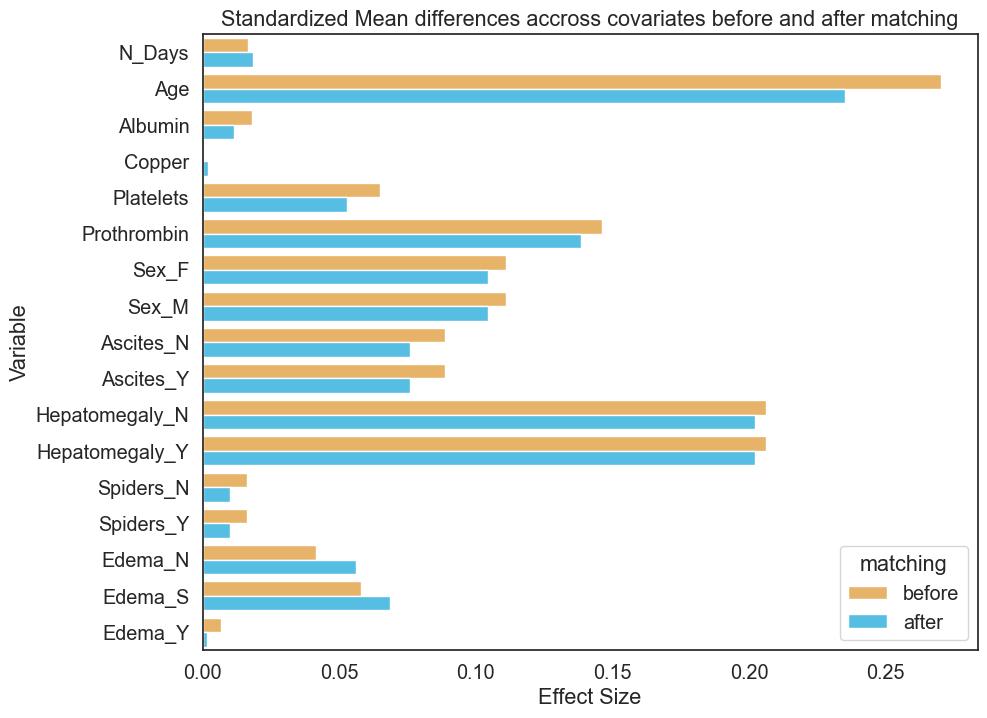

In [68]:
psm.effect_size_plot()

In [69]:
psm.effect_size

,Variable,matching,Effect Size
0,N_Days,before,0.016672
1,N_Days,after,0.018487
2,Age,before,0.270088
3,Age,after,0.235156
4,Albumin,before,0.017989
5,Albumin,after,0.011533
6,Copper,before,0.000076
7,Copper,after,0.001976
8,Platelets,before,0.065092
9,Platelets,after,0.052940


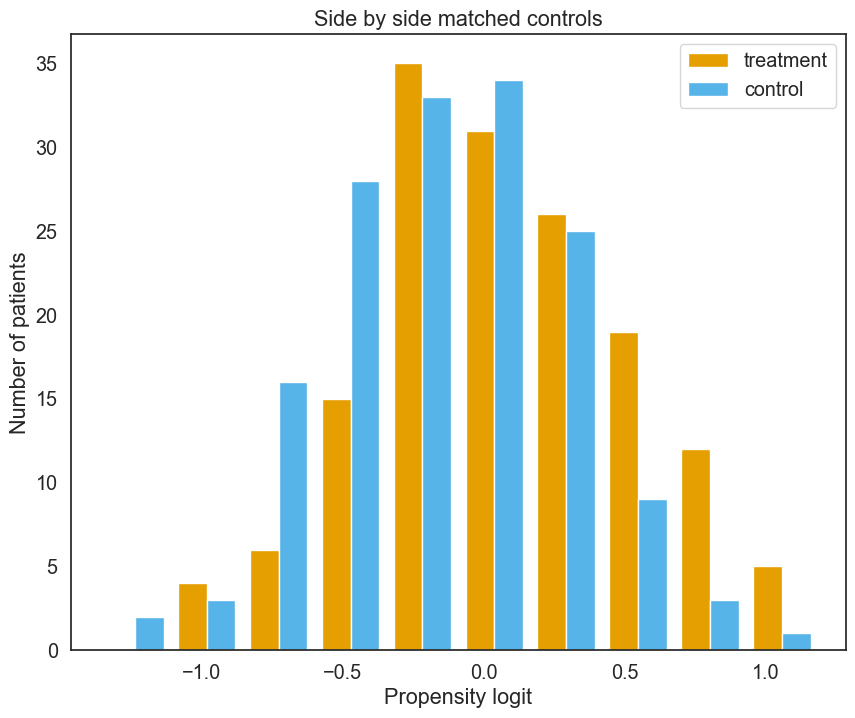

In [70]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'],save=True)

In [71]:
import dowhy
from dowhy import CausalModel as cm
cm?

In [72]:
import causalinference
from causalinference import CausalModel as cmm

In [73]:
newdata.head()

,ID,N_Days,Status,Drug,Age,Albumin,Copper,Platelets,Prothrombin,Stage,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,1,400,1,1,21464,2.60,156.0,190.0,12.2,4,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,4500,0,1,20617,4.14,54.0,221.0,10.6,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,3,1012,1,1,25594,3.48,210.0,151.0,12.0,4,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,1925,1,1,19994,2.54,64.0,183.0,10.3,4,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,1504,0,0,13918,3.53,143.0,136.0,10.9,3,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [74]:
y= newdata.loc[:,"Stage"].values
d= newdata.loc[:,"Drug"].values
x= newdata.drop(columns=["Stage","Drug","Status","ID"]).values
model=cmm(y,d,x)
model.est_via_matching(bias_adj=True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.171      0.130     -1.316      0.188     -0.426      0.084
           ATC     -0.238      0.142     -1.677      0.094     -0.517      0.040
           ATT     -0.106      0.152     -0.698      0.485     -0.404      0.192



C:\Users\Arunima Srivastava\anaconda3\Lib\site-packages\causalinference\estimators\matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef
